##  Data Preprocess




In [27]:
#packages needed

import sys

!{sys.executable} -m pip install numpy
import numpy as np 

!{sys.executable} -m pip install pandas
import pandas as pd

!{sys.executable} -m pip install nltk
import nltk

import warnings
warnings.simplefilter(action='ignore')

#text normalization function
%run ./Text_Normalization_Function.ipynb


!{sys.executable} -m pip install wordcloud

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet


import seaborn as sns

!{sys.executable} -m pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenmengzhen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chenmengzhen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/chenmengzhen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chenmengzhen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     |████████████████████████████████| 163kB 1.1MB/s eta 0:00:01


In [28]:
df = pd.read_csv("./Amazon Reviews.csv")

Shape of dataset

In [29]:
df.shape

(1597, 27)

See NA values in each column

In [30]:
df.isnull().sum()

id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
Score                    420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64

Drop rows containing missing score value

In [31]:
df1 = df[df['Score'].notna()]
df1.shape

(1177, 27)

Customer Rating Distribution

5.0    741
4.0    236
3.0    124
1.0     42
2.0     34
Name: Score, dtype: int64


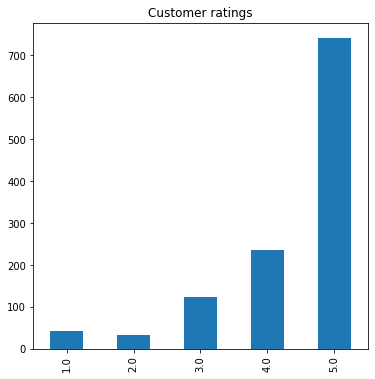

In [32]:
from matplotlib import pyplot
%matplotlib inline

rating = df1.Score.value_counts()
print(df1.Score.value_counts())
rating.sort_index(inplace=True)
rating.plot(kind='bar',title='Customer ratings',figsize=(6,6),style='Solarize_Light')

See products with top 10 score 

In [33]:
top_score = df1.groupby('name')['Score'].mean()
top_score_df = pd.DataFrame()
top_score_df['Score'] = top_score
top_score_df.sort_values(by =['Score'],inplace=True,ascending = False)
top_ten = top_score_df.head(10)
top_ten

,Score
name,
Kindle Paperwhite 3G,5.000000
All-New Fire HD 8 Kids Edition Tablet,5.000000
Kindle E-reader - Black,5.000000
Fire HD 7 Tablet,5.000000
Fire HD 6 Tablet,5.000000
Certified Refurbished Kindle Paperwhite E-reader - Black,5.000000
All-New Amazon Kid-Proof Case for Amazon Fire HD 8 Tablet (7th Generation,5.000000
Kindle Paperwhite E-reader - Black,5.000000
Amazon Echo - Black,5.000000


Lower case

In [34]:
df1['reviews.text'] = df1['reviews.text'].str.lower()

Remove stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenmengzhen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


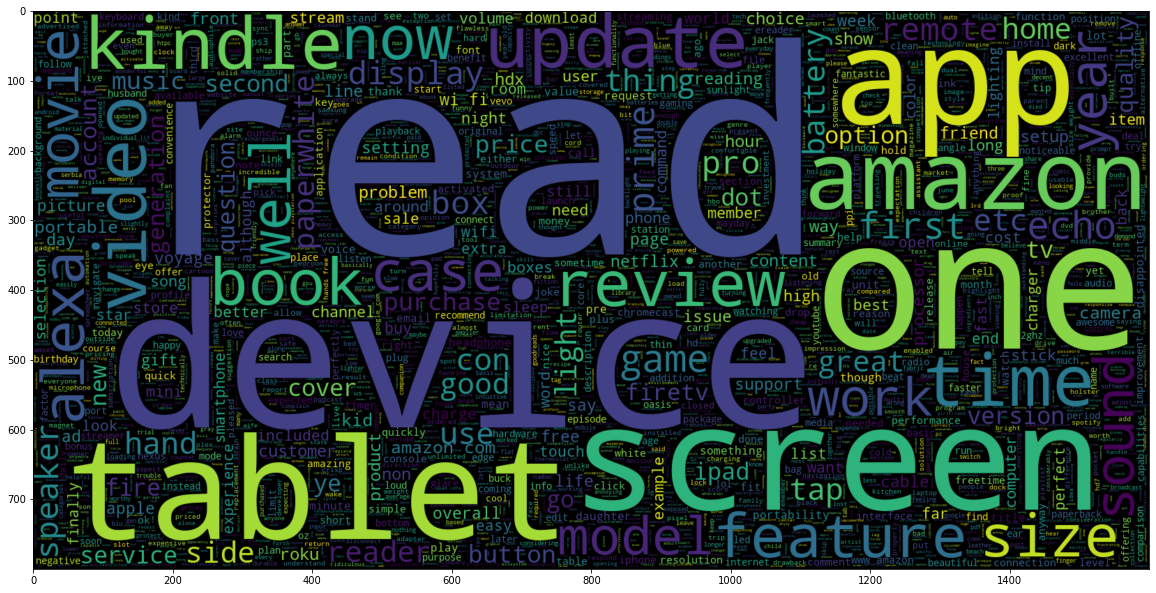

In [35]:
# Remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stopWords = stopwords.words("english")
stop_words=set(stopwords.words("english"))

word_count = {}

for index,row in df1.iterrows():
    review = row['reviews.text']
    words = str(review).lower().split(" ")
    for word in words:
        if word in word_count:
            word_count[word] +=1
        else:
            word_count[word] = 1    

# Word cloud of review text        
plt.figure(figsize = (20,20)) 
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(word_count))
plt.imshow(wc,interpolation = 'bilinear')

Create a new column and define positivity of reviews \
Score of 1,2,3 refers to 0 (negative) and 4,5 are 1(positive)

In [36]:

def rating(score): 
    if(int(score) == 1 or int(score) == 2 or int(score) == 3):
        return 0
    else: 
        return 1
df1['Positivity'] = df1.Score.apply(rating) 

# Training and test data
train_review,test_review,train_positivity,test_positivity = \
train_test_split(df1['reviews.text'],df1['Positivity'],test_size = 0.2 , random_state = 0)

# Normalize the data
norm_test_review = normalize_corpus(test_review)
norm_train_review = normalize_corpus(train_review)
 
# Vectorize normalized data
# Bag-of-words
bow_vectorizer = CountVectorizer()
bow_reviews_train_vectorized = bow_vectorizer.fit_transform(norm_train_review)


Logistic regression

In [37]:
# train_reviews_vectorized = vectorizer_BOW.transform(train_reviews)
model = LogisticRegression()
model.fit(bow_reviews_train_vectorized,train_positivity)

#Prediction
predictions = model.predict(bow_vectorizer.transform(norm_test_review))
accuracy_score(test_positivity, predictions)

0.9067796610169492

In [38]:
# Coefficient determines the weight of a word (positivity or negativity)
# Check the top 10 positive and negative words

# getting the feature names
feature_names = np.array(bow_vectorizer.get_feature_names())

# argsort: Integer indicies that would sort the index if used as an indexer
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs: 
['question' 'terrible' 'stop' 'think' 'fine' 'hard' 'overpriced' 'hold'
 'horrible' 'previous']

Largest Coefs: 
['love' 'alexa' 'great' 'excellent' 'portability' 'take' 'perfect' 'non'
 'move' 'right']



In [41]:
# Compute and print out the TF-IDF and the Bag-of-Words representations for NORM_corpus
TF_IDF_vectorizer = TfidfVectorizer(norm = 'l2', smooth_idf = True)

TF_IDF_matrix = TF_IDF_vectorizer.fit_transform(norm_train_review).toarray()
pd.DataFrame(np.round(TF_IDF_matrix, 2), columns=TF_IDF_vectorizer.get_feature_names())
print(np.round(TF_IDF_vectorizer.idf_,2))

[7.15 7.15 7.15 ... 6.75 7.15 7.15]


In [42]:
# Logistic regression with TF_IDF
TF_IDF_reviews_train_vectorized = TF_IDF_vectorizer.fit_transform(norm_train_review)

model.fit(TF_IDF_reviews_train_vectorized,train_positivity)

#Prediction
predictions2 = model.predict(TF_IDF_vectorizer.transform(norm_test_review))
accuracy_score(test_positivity, predictions2)

0.8601694915254238

In [43]:
# Getting the feature names with TF_IDF
feature_names2 = np.array(TF_IDF_vectorizer.get_feature_names())

# Integer indicies that would sort the index if used as an indexer
sorted_coef_index2 = model.coef_[0].argsort()

print('Smallest Coefs: \n{}\n'.format(feature_names2[sorted_coef_index2[:10]]))
print('Largest Coefs: \n{}\n'.format(feature_names2[sorted_coef_index2[:-11:-1]]))

Smallest Coefs: 
['remote' 'stop' 'terrible' 'range' 'fine' 'question' 'return' 'phone'
 'work' 'hard']

Largest Coefs: 
['love' 'great' 'tap' 'alexa' 'echo' 'look' 'perfect' 'play' 'portability'
 'awesome']



Classification report for bag of words

In [44]:
logis_bow_report=classification_report(test_positivity,predictions,target_names=['0','1'])
print(logis_bow_report)

              precision    recall  f1-score   support

           0       0.86      0.64      0.73        47
           1       0.92      0.97      0.94       189

    accuracy                           0.91       236
   macro avg       0.89      0.81      0.84       236
weighted avg       0.90      0.91      0.90       236



Classification report for tfidf features

In [45]:
logis_tfidf_report=classification_report(test_positivity,predictions2,target_names=['0','1'])
print(logis_tfidf_report)

              precision    recall  f1-score   support

           0       1.00      0.30      0.46        47
           1       0.85      1.00      0.92       189

    accuracy                           0.86       236
   macro avg       0.93      0.65      0.69       236
weighted avg       0.88      0.86      0.83       236



# TOPIC MODELING

In [47]:
#the module 'sys' allows istalling module from inside Jupyter
import sys

!{sys.executable} -m pip install numpy
import numpy as np

!{sys.executable} -m pip install pandas
import pandas as pd

#Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

!{sys.executable} -m pip install sklearn
from sklearn import metrics
#from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import  CountVectorizer #bag-of-words vectorizer 
from sklearn.decomposition import LatentDirichletAllocation #package for LDA

# Plotting tools

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
%matplotlib inline

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#define text normalization function
%run ./Text_Normalization_Function.ipynb #defining text normalization function

Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenmengzhen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chenmengzhen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/chenmengzhen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chenmengzhen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Below we define two functions that will display the results of fitting a topic model, to be used later:

In [48]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

### Amazon Data

In [49]:
df = pd.read_csv("Amazon Reviews.csv")
reviews = np.array(df["reviews.text"])

**Normalize**

In [50]:
normalized_corpus = normalize_corpus(reviews) 

**Bag-of-Words**

In [51]:
#define the bag-of-words vectorizer:
bow_vectorizer = CountVectorizer()

#vectorize the normalized data:
bow_corpus = bow_vectorizer.fit_transform(normalized_corpus)

In [52]:
pd.DataFrame(data = bow_corpus.todense(), columns = bow_vectorizer.get_feature_names())

,000s,0x0,1000ma,100mbps,1080p,10min,10w,11ac,1200x800,120v,...,youve,yr,zarathustra,zen,zink,zip,zippy,zombies,zoom,zumi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Topic Model (via Latent Dirichlet Allocation) on Data

In [53]:
lda_corpus = LatentDirichletAllocation(n_components = 3, max_iter = 500,
                                           doc_topic_prior = 0.9,
                                           topic_word_prior = 0.9).fit(bow_corpus)

Display results by showing 15 **most frequent (top)** words for each topic:

In [54]:
no_top_words = 15
display_topics(lda_corpus, bow_vectorizer.get_feature_names(), no_top_words)

Topic 0:
kindle great use amazon read screen new want echo book buy like tap good love
Topic 1:
headphone sound like ear apple feel use people good nice think compare fall well design
Topic 2:
fire amazon tv prime use device hdx content kindle tablet hd review year movie video


In [55]:
word_weights = lda_corpus.components_ / lda_corpus.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T, 
                               index = bow_vectorizer.get_feature_names(), 
                               columns = ["Topic_" + str(i) for i in range(3)])
word_weights_df.head(10)

,Topic_0,Topic_1,Topic_2
000s,0.000032,0.000035,0.000017
0x0,0.000040,0.000036,0.000026
1000ma,0.000032,0.000035,0.000017
100mbps,0.000020,0.000036,0.000048
1080p,0.000016,0.000035,0.000867
10min,0.000017,0.000037,0.000032
10w,0.000032,0.000035,0.000016
11ac,0.000020,0.000036,0.000048
1200x800,0.000026,0.000035,0.000042
120v,0.000017,0.000068,0.000017


In [56]:
word_weights_df.sort_values(by = "Topic_0", ascending = False).head(10)

,Topic_0,Topic_1,Topic_2
kindle,0.016830,0.000036,0.009662
great,0.011070,0.002958,0.001846
use,0.011000,0.012780,0.012871
amazon,0.009737,0.005288,0.015173
read,0.009696,0.008136,0.006036
screen,0.009096,0.000036,0.002873
new,0.007659,0.000038,0.003509
want,0.007568,0.004597,0.003075
echo,0.007409,0.000040,0.000017
book,0.007371,0.000036,0.001364


### Topic Model Visualization

In [57]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_corpus, bow_corpus, bow_vectorizer, mds='tsne')

PreparedData(topic_coordinates=                 x           y  topics  cluster       Freq
topic                                                     
0      -632.045471 -384.325073       1        1  41.810063
2     -1209.665405  212.164124       2        1  40.484685
1     -1437.453247 -586.322510       3        1  17.705252, topic_info=     Category         Freq         Term        Total  loglift  logprob
2182  Default   713.000000    headphone   713.000000  30.0000  30.0000
4288  Default   788.000000        sound   788.000000  29.0000  29.0000
1815  Default  1269.000000         fire  1269.000000  28.0000  28.0000
4768  Default   755.000000           tv   755.000000  27.0000  27.0000
3550  Default   730.000000        prime   730.000000  26.0000  26.0000
2704  Default  1192.000000         like  1192.000000  25.0000  25.0000
1466  Default   319.000000          ear   319.000000  24.0000  24.0000
343   Default   574.000000        apple   574.000000  23.0000  23.0000
2175  Default   561.000000          hdx   561.000000  22.0000  22.0000
1057  Default   553.000000      content   553.000000  21.0000  21.0000
1776  Default   441.000000         feel   441.000000  20.0000  20.0000
3356  Default   328.000000       people   328.000000  19.0000  19.0000
1730  Default   222.000000         fall   222.000000  18.0000  18.0000
3099  Default   458.000000         nice   458.000000  17.0000  17.0000
1263  Default   222.000000       design   222.000000  16.0000  16.0000
703   Default   196.000000          bud   196.000000  15.0000  15.0000
972   Default   329.000000      compare   329.000000  14.0000  14.0000
2802  Default   190.000000       magnet   190.000000  13.0000  13.0000
1487  Default   389.000000         echo   389.000000  12.0000  12.0000
4073  Default   258.000000          set   258.000000  11.0000  11.0000
3006  Default   376.000000        movie   376.000000  10.0000  10.0000
1468  Default   184.000000      earbuds   184.000000   9.0000   9.0000
4541  Default   374.000000          tap   374.000000   8.0000   8.0000
4618  Default   430.000000        think   430.000000   7.0000   7.0000
2166  Default   516.000000           hd   516.000000   6.0000   6.0000
2595  Default  1371.000000       kindle  1371.000000   5.0000   5.0000
3087  Default   289.000000        never   289.000000   4.0000   4.0000
4300  Default   359.000000      speaker   359.000000   3.0000   3.0000
3926  Default   343.000000         roku   343.000000   2.0000   2.0000
3679  Default   173.000000        range   173.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
3161   Topic3    57.832173    obviously    60.079987   1.6932  -5.9488
1128   Topic3    54.470411        crazy    56.687097   1.6914  -6.0086
3356   Topic3   260.000677       people   328.282839   1.4981  -4.4456
2257   Topic3    61.687631          hop    65.244741   1.6752  -5.8842
4288   Topic3   545.957200        sound   788.204021   1.3641  -3.7038
507    Topic3    63.362408         bass    67.850628   1.6629  -5.8574
984    Topic3    59.894597     complain    63.556670   1.6720  -5.9137
2186   Topic3   101.676183         hear   118.646137   1.5770  -5.3845
952    Topic3   105.674691  comfortable   124.706980   1.5657  -5.3459
4073   Topic3   193.789629          set   258.996076   1.4413  -4.7395
1776   Topic3   291.718253         feel   441.373589   1.3172  -4.3305
5128   Topic3   113.108371        write   139.632766   1.5206  -5.2780
972    Topic3   218.858284      compare   329.050702   1.3235  -4.6179
3087   Topic3   197.149708        never   289.513220   1.3471  -4.7223
3788   Topic3    90.097328      regular   106.958073   1.5598  -5.5054
2859   Topic3   106.934852        maybe   135.475738   1.4947  -5.3341
343    Topic3   313.897668        apple   574.216920   1.1274  -4.2572
2704   Topic3   513.541582         like  1192.897203   0.8885  -3.7650
3099   Topic3   244.597434         nice   458.752181   1.1024  -4.5067
4266   Topic3   153.207766    something  

### Dominant Topic in a Document

In [59]:
lda_topic_weights = lda_corpus.transform(bow_corpus)

Let's convert lda_topic_weights into a nice-looking dataframe and have a look at the computed topic weights in documents:

In [60]:
#array of document "names" and topic "names" ("names" are just indecies)
doc_names = ["Doc_" + str(i) for i in range(len(normalized_corpus))]
topic_names = ["Topic_" + str(i) for i in range(3)]

#convert to dataframe
df_document_topic = pd.DataFrame(np.round(lda_topic_weights, 3), columns=topic_names, index=doc_names)
df_document_topic.head(5)

,Topic_0,Topic_1,Topic_2
Doc_0,0.963,0.020,0.017
Doc_1,0.839,0.022,0.139
Doc_2,0.692,0.066,0.242
Doc_3,0.871,0.058,0.071
Doc_4,0.931,0.044,0.025


In [62]:
#vector of indecies for columns with the highest value by each row in df_document_topic
dominant_topic = np.argmax(df_document_topic.values, axis=1)

#add dominant_topic as a column to df_document_topic
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic.head()

,Topic_0,Topic_1,Topic_2,dominant_topic
Doc_0,0.963,0.020,0.017,0
Doc_1,0.839,0.022,0.139,0
Doc_2,0.692,0.066,0.242,0
Doc_3,0.871,0.058,0.071,0
Doc_4,0.931,0.044,0.025,0


### Topic Model Evaluation: Log-likelihood, Perplexity and Coherence Scores (3 topics)

In [65]:
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

In [66]:
#tokenizing the corpus
news_corpus_tokenized = [tokenize_text(normalized_corpus[doc_id]) for doc_id in range(len(normalized_corpus))]

#Dictionary of the corpus:
news_dictionary = Dictionary(news_corpus_tokenized)

#Bag-of-words representation for each document of the corpus:
news_corpus_bow = [news_dictionary.doc2bow(doc) for doc in news_corpus_tokenized]

#top 20 words for each topic (using the function defined in session prep)
topic_topwords = get_topic_words(vectorizer = bow_vectorizer, lda_model = lda_corpus, n_words=20)

### Topic Model Evaluation: Log-likelihood, Perplexity and Coherence Scores (3 topics)

In [67]:
cm = CoherenceModel(topics=topic_topwords, 
                    corpus = news_corpus_bow , 
                    dictionary = news_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm.get_coherence(), 4))
print("Coherence score by topic (higher values are better): ", np.round(cm.get_coherence_per_topic(),4))
print("Log-Likelihood (higher values are better): ", lda_corpus.score(bow_corpus))
print("Perplexity (lower values are better): ", lda_corpus.perplexity(bow_corpus))

Coherence score for the model:  -1.1577
Coherence score by topic (higher values are better):  [-1.3162 -1.0267 -1.1301]
Log-Likelihood (higher values are better):  -844966.0935819871
Perplexity (lower values are better):  853.4678024490116


### Topic Model Evaluation: Log-likelihood, Perplexity and Coherence Scores (2 topics)

In [68]:
lda_corpus_2_topics = LatentDirichletAllocation(n_components=2, max_iter=500,
                                           doc_topic_prior = 0.9,
                                           topic_word_prior = 0.9).fit(bow_corpus)


topic_topwords_2_topics = get_topic_words(vectorizer = bow_vectorizer, lda_model = lda_corpus_2_topics, n_words=20)
cm_2_topics = CoherenceModel(topics=topic_topwords_2_topics, 
                             corpus = news_corpus_bow, 
                             dictionary = news_dictionary, coherence='u_mass')
print("Coherence score for the model (higher values are better): ", np.round(cm_2_topics.get_coherence(), 4)) 
print("Coherence score by topic (higher values are better): ", np.round(cm_2_topics.get_coherence_per_topic(),4))
print("Log-Likelihood (higher values are better): ", lda_corpus_2_topics.score(bow_corpus))
print("Perplexity (lower values are better): ", lda_corpus_2_topics.perplexity(bow_corpus))

Coherence score for the model (higher values are better):  -1.2465
Coherence score by topic (higher values are better):  [-1.4293 -1.0636]
Log-Likelihood (higher values are better):  -856436.3533677987
Perplexity (lower values are better):  935.3571485764804


### Topic Model Evaluation: Log-likelihood, Perplexity and Coherence Scores (4 topics)

In [69]:
lda_corpus_4_topics = LatentDirichletAllocation(n_components=4, max_iter=500,
                                           doc_topic_prior = 0.9,
                                           topic_word_prior = 0.9).fit(bow_corpus)


topic_topwords_4_topics = get_topic_words(vectorizer = bow_vectorizer, lda_model = lda_corpus_4_topics, n_words=20)
cm_4_topics = CoherenceModel(topics=topic_topwords_4_topics, 
                             corpus = news_corpus_bow, 
                             dictionary = news_dictionary, coherence='u_mass')
print("Coherence score for the model (higher values are better): ", np.round(cm_4_topics.get_coherence(), 4)) 
print("Coherence score by topic (higher values are better): ", np.round(cm_4_topics.get_coherence_per_topic(),4))
print("Log-Likelihood (higher values are better): ", lda_corpus_4_topics.score(bow_corpus))
print("Perplexity (lower values are better): ", lda_corpus_4_topics.perplexity(bow_corpus))

Coherence score for the model (higher values are better):  -1.1341
Coherence score by topic (higher values are better):  [-1.1154 -1.0392 -1.3248 -1.0569]
Log-Likelihood (higher values are better):  -842413.1225187441
Perplexity (lower values are better):  836.2399007718792


## SENTIMENT ANALYSIS 


### Objectives

1. Learn how to perform lexicon-based (unsupervised machine learning) sentiment analysis.
2. Fine-tune a lexicon-based sentiment analyzer.
2. Train your own sentiment classifier.

### Session Prep

In [1]:
#packages needed

import sys

!{sys.executable} -m pip install numpy
import numpy as np 

!{sys.executable} -m pip install pandas
import pandas as pd

!{sys.executable} -m pip install nltk
import nltk

import warnings
warnings.simplefilter(action='ignore')

#text normalization function
%run ./Text_Normalization_Function.ipynb

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenmengzhen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chenmengzhen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/chenmengzhen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chenmengzhen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

### Dataset


In [2]:
import pandas as pd
df = pd.read_csv("./Amazon Reviews Sample.csv")
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight,Polarity
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,http://www.amazon.com/Kindle-Paperwhite-High-R...,"My previous kindle was a DX, this is my second...",Great device for reading. 8 people found this ...,NaN,NaN,Kelvin Law,NaN,NaN,205 grams,positive
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,http://www.amazon.com/Kindle-Paperwhite-High-R...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader 18 ...,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams,positive
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,http://www.amazon.ca/product-reviews/B00QJDU3KY,I love my kindle! I got one for my fiance on h...,I love it!,NaN,NaN,samira,NaN,NaN,205 grams,positive
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,http://www.amazon.ca/product-reviews/B00QJDU3KY,Received my new kindle in perfect condition an...,great kindle,NaN,NaN,satisfied customer,NaN,NaN,205 grams,positive
4,AVpfBEWcilAPnD_xTGb7,B002Y27P3M,Amazon,"Kindle Store,Amazon Devices,Electronics",NaN,2015-01-17T12:14:51Z,2015-11-01T00:05:54Z,NaN,NaN,"kindlekeyboard/b002y27p3m,amazon/d01101",...,http://www.amazon.com/Kindle-Wireless-Reader-W...,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",NaN,NaN,Jeffrey Stanley,NaN,NaN,1.1 pounds,positive


In [3]:
test_data = df.iloc[0:50]
test_data.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight,Polarity
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,http://www.amazon.com/Kindle-Paperwhite-High-R...,"My previous kindle was a DX, this is my second...",Great device for reading. 8 people found this ...,NaN,NaN,Kelvin Law,NaN,NaN,205 grams,positive
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,http://www.amazon.com/Kindle-Paperwhite-High-R...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader 18 ...,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams,positive
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,http://www.amazon.ca/product-reviews/B00QJDU3KY,I love my kindle! I got one for my fiance on h...,I love it!,NaN,NaN,samira,NaN,NaN,205 grams,positive
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,http://www.amazon.ca/product-reviews/B00QJDU3KY,Received my new kindle in perfect condition an...,great kindle,NaN,NaN,satisfied customer,NaN,NaN,205 grams,positive
4,AVpfBEWcilAPnD_xTGb7,B002Y27P3M,Amazon,"Kindle Store,Amazon Devices,Electronics",NaN,2015-01-17T12:14:51Z,2015-11-01T00:05:54Z,NaN,NaN,"kindlekeyboard/b002y27p3m,amazon/d01101",...,http://www.amazon.com/Kindle-Wireless-Reader-W...,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",NaN,NaN,Jeffrey Stanley,NaN,NaN,1.1 pounds,positive


In [4]:
train_data = df.iloc[50:100]
train_data.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight,Polarity
50,AVpfAVXdLJeJML430RhN,B00KSR13CE,Amazon,"Amazon Devices,Kindle Accessories",NaN,2015-05-01T21:13:00Z,2017-07-18T23:52:58Z,NaN,NaN,kindlepaperwhite/b00ksr13ce,...,http://www.amazon.com/Paperwhite-Resolution-Di...,I have loved and used my Kindle Keyboard for y...,A new step forward for me in reading on my Kin...,NaN,NaN,JJCEO,NaN,NaN,NaN,positive
51,AV1T1naH-jtxr-f31CpM,B01M71HRMY,Amazon,"Electronics,Amazon Devices",NaN,2017-07-18T03:55:50Z,2017-07-25T17:42:56Z,NaN,NaN,allnewfire7tabletwithalexa/b01m71hrmy,...,https://www.amazon.com/All-New-Amazon-Fire-7-T...,Amazon has just updated their bargain priced F...,Amazon's two Bargain Fire Tablets How good is ...,NaN,NaN,Phil (not) in Magnolia,NaN,NaN,NaN,positive
52,AVpe7LD5LJeJML43ybWA,"B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B0...",Amazon,"Amazon Devices,Kindle Store,buy a kindle",NaN,2015-05-22T15:33:59Z,2017-07-18T23:52:40Z,NaN,NaN,"kindlefirehdx7/b00dopno4m,kindlefirehdx7/b00bw...",...,http://www.amazon.com/kindle-fire-hdx-student-...,I am 67 and the only problem I have with my ki...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
53,AVpe7LD5LJeJML43ybWA,"B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B0...",Amazon,"Amazon Devices,Kindle Store,buy a kindle",NaN,2015-05-22T15:33:59Z,2017-07-18T23:52:40Z,NaN,NaN,"kindlefirehdx7/b00dopno4m,kindlefirehdx7/b00bw...",...,http://www.amazon.com/Kindle-Display-Wi-Fi-Pre...,To sum up what I will tell you about in the de...,Nice Tablet with Sharp Display,NaN,NaN,please let us know.,NaN,NaN,NaN,positive
54,AVpe7LD5LJeJML43ybWA,"B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B0...",Amazon,"Amazon Devices,Kindle Store,buy a kindle",NaN,2015-05-22T15:33:59Z,2017-07-18T23:52:40Z,NaN,NaN,"kindlefirehdx7/b00dopno4m,kindlefirehdx7/b00bw...",...,http://www.amazon.com/Kindle-Fire-HDX-Display-...,"Extremely wonderful tablet, it definitely gets...","Kinder Fire, Very Hot!",NaN,NaN,Del,NaN,NaN,NaN,positive


In [5]:
test_reviews = np.array(test_data['reviews.text'])
test_polarity = np.array(test_data['Polarity'])

train_reviews = np.array(train_data['reviews.text'])
train_polarity = np.array(train_data['Polarity'])

Normalize the text for reviews and call the normalized corpora of review texts **normalized_test_reviews** and **normalized_train_reviews**:

In [6]:
normalized_test_reviews = normalize_corpus(test_reviews)
normalized_train_reviews = normalize_corpus(train_reviews)

## Lexicon-Based Sentiment Analysis (Unsupervised Machine Learning)

### VADER Lexicon

We will use the **VADER lexicon** available through the NLTK module. VADER stands for **Valence Aware Dictionary and sEntiment Reasoner**. The lexicon informs both about the **polarity** (positive /negative) and **intensity** of the sentiment.

You can read on how VADER was created here (it's a pretty pretty exciting and accessible read): http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf.

Let's **download** the VADER lexicon: 

In [7]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chenmengzhen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Import the **sentiment analysis function** SentimentIntensityAnalyzer() that uses the VADER lexicon from the NLTK package. Let's refer to that function as (sentiment) **analyzer** for short:

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

The function assigns sentiment **scores** to each word in text according to the VADER lexicon.


 

### VADER Lexicon-Based Sentiment Analysis of Customer Reviews

We'll use the **test** dataset for the sentiment scoring of customer reviews. 

Have a look at a couple of **sample reviews** and the sentiment polarity labels created by humans for two sample documents:

In [9]:
sample_docs = [10,20,34,40] #indecies for 4 sample documnets 

for doc_index in sample_docs:
    print('Review:-')
    print(test_reviews[doc_index])
    print('Actual Labeled Sentiment:', test_polarity[doc_index])
    print()

Review:-
Simply put, this is the Amazons iPad Air Killer. The 7 HDX is the iPad mini killer. Both HDXs inherent very similar hardware. This means the 8.9 version is an enlarged version of the 7 version. For my 7 version review, please search for my HDX 7 review.My profile: Im a heavy tablet user for personal and business purposes. I work on my tablet around 4-5 hours a day (Email / Documents / Spreadsheet / PDF) use the tablet 1-2 hours for personal use such as watching movies or reading books/magazine. The HDX tablet is my go-to device for all internet related search I do. It is also my main electronic device, more important than my smartphones and laptopsI have the following and/or used the following before:1) iPad 12) iPad 23) iPad 44) iPad Mini5) Kindle Fire6) Kindle Fire HD7) Kindle Fire HD 8.98) Asus Transformer with Keyboard9) Nexus 7 First Gen10) Kindle HDX 7 which I also have a review you can check outAs you can see, I been through many devices and hope this review with my exp

Let's create a **function that scores text using VADER lexicon and prints the actual and scored sentiment**. 

Our function called **analyze_sentiment_vader_lexicon** will take the review text as an input. It will return the **VADER sentiment score** and the **binary sentiment polarity** (positive/negative) based on it. 

The function will use the following rule for assigning binary sentiment polarity: if "compound" score > **0.1** then the review is **positive**, otherwise it's negative. In other words, the **0.1** VADER score is the **threshold** for defining a positive review. The threshold is *arbitrary*, to some extent, and we'll be chaning it later. 

The function we define:

In [10]:
def analyze_sentiment_vader_lexicon(review, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']  

Now we can apply the function to score sentiment in the sample documents and get a sense of what the function does:

In [11]:
for doc_index in sample_docs:
    print('\nReview text:\n')
    print(test_reviews[doc_index],"\n")
    print('ACTUAL Polarity (Labeled by Human):', test_polarity[doc_index],"\n")    
    final_sentiment = analyze_sentiment_vader_lexicon(normalized_test_reviews[doc_index],
                                                        threshold=0.1,
                                                        verbose=True)
    print('-'*60)     


Review text:

Simply put, this is the Amazons iPad Air Killer. The 7 HDX is the iPad mini killer. Both HDXs inherent very similar hardware. This means the 8.9 version is an enlarged version of the 7 version. For my 7 version review, please search for my HDX 7 review.My profile: Im a heavy tablet user for personal and business purposes. I work on my tablet around 4-5 hours a day (Email / Documents / Spreadsheet / PDF) use the tablet 1-2 hours for personal use such as watching movies or reading books/magazine. The HDX tablet is my go-to device for all internet related search I do. It is also my main electronic device, more important than my smartphones and laptopsI have the following and/or used the following before:1) iPad 12) iPad 23) iPad 44) iPad Mini5) Kindle Fire6) Kindle Fire HD7) Kindle Fire HD 8.98) Asus Transformer with Keyboard9) Nexus 7 First Gen10) Kindle HDX 7 which I also have a review you can check outAs you can see, I been through many devices and hope this review with 

Let's score now all reviews in the **test** dataset:

In [12]:
VADER_polarity_test = [analyze_sentiment_vader_lexicon(review, threshold=0.1) for review in test_reviews]
VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_test_df.head()

,VADER Polarity,VADER Score
0,positive,0.1695
1,positive,0.4364
2,positive,0.9907
3,positive,0.8908
4,negative,-0.0580


In [13]:
df_c=pd.DataFrame(df, columns = ['categories'])
df_c.head()

,categories
0,"Amazon Devices,mazon.co.uk"
1,"Amazon Devices,mazon.co.uk"
2,"Amazon Devices,mazon.co.uk"
3,"Amazon Devices,mazon.co.uk"
4,"Kindle Store,Amazon Devices,Electronics"


In [14]:
df_row =pd.concat([df_c,VADER_polarity_test_df], axis=1)
df_row.head()

,categories,VADER Polarity,VADER Score
0,"Amazon Devices,mazon.co.uk",positive,0.1695
1,"Amazon Devices,mazon.co.uk",positive,0.4364
2,"Amazon Devices,mazon.co.uk",positive,0.9907
3,"Amazon Devices,mazon.co.uk",positive,0.8908
4,"Kindle Store,Amazon Devices,Electronics",negative,-0.0580


In [15]:
df_row.groupby("categories").mean()[["VADER Score"]]

,VADER Score
categories,
Amazon Devices,0.617086
"Amazon Devices & Accessories,Amazon Device Accessories,Controllers & Remote Controls,Kindle Store,Fire TV Accessories,Controllers & Remotes,Controllers",NaN
"Amazon Devices & Accessories,Amazon Device Accessories,Power Adapters & Cables,Kindle Store,Kindle E-Reader Accessories,Kindle Paperwhite Accessories",0.000000
"Amazon Devices,Corded Headsets,Electronics Features,Electronics,Audio,Headphones,Kindle Store,Kindle Accessories",NaN
"Amazon Devices,Home,Smart Home & Connected Living,Smart Hubs & Wireless Routers,Smart Hubs,Home Improvement,Home Safety & Security,Alarms & Sensors,Home Security,Amazon Echo,Home, Garage & Office,Smart Home,Voice Assistants,Amazon Tap,Electronics Features,TVs & Electronics,Portable Audio & Electronics,MP3 Player Accessories,Home Theater & Audio,Speakers,Featured Brands,Electronics,Kindle Store,Frys,Electronic Components,Home Automation,Electronics, Tech Toys, Movies, Music,Audio,Bluetooth Speakers",NaN
"Amazon Devices,Kindle Accessories",0.906100
"Amazon Devices,Kindle Store",0.580467
"Amazon Devices,Kindle Store,buy a kindle",NaN
"Amazon Devices,mazon.co.uk",0.621850


Since we have **human-created labels** for sentiment polarity in our data (positive/negative), we can compute the **accuracy rate** for the binary sentiment prediction made using the VADER lexicon, conditional on the threshold value of 0.1 we selected earlier. The accuracy rate: 

In [16]:
from sklearn import metrics
print('Accuracy Rate:', np.round(metrics.accuracy_score(test_polarity, 
                                 VADER_polarity_test_df['VADER Polarity']), 3),"\n")

Accuracy Rate: 0.86 



Confusion matrix:

In [17]:
pd.crosstab(pd.Series(test_polarity), 
            pd.Series(VADER_polarity_test_df['VADER Polarity']), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,negative,positive,All
True:,,,
negative,2,3,5
positive,4,41,45
All,6,44,50


Precision for this VADER lexicon-based sentiment analysis tool

In [18]:
true_positives=41
false_positives=3
precision= true_positives / (true_positives + false_positives)
print(precision)

0.9318181818181818


Sensitivity for this VADER lexicon-based sentiment analysis tool

In [19]:
false_negatives=4
Sensitivity = true_positives / (true_positives + false_negatives)
print(Sensitivity)

0.9111111111111111


Have a look at raw VADER scores assigned to actual positive reviews:

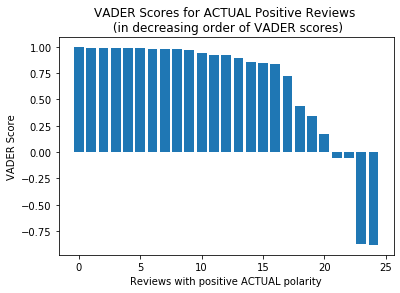

In [20]:
import matplotlib.pyplot as plt

pos_reviews_scored = VADER_polarity_test_df[:25]['VADER Score']
plt.bar(range(0, 25), pos_reviews_scored.sort_values(ascending=False))
plt.xlabel("Reviews with positive ACTUAL polarity")
plt.ylabel("VADER Score")
plt.title("VADER Scores for ACTUAL Positive Reviews \n (in decreasing order of VADER scores)")
plt.show()

Now, have a look at VADER scores assigned to actual negative reviews:

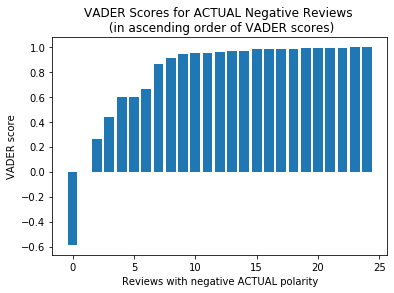

In [21]:
neg_reviews_scored = VADER_polarity_test_df[25:50]['VADER Score']
plt.bar(range(0, 25), neg_reviews_scored.sort_values(ascending=True))
plt.xlabel("Reviews with negative ACTUAL polarity")
plt.ylabel("VADER score")
plt.title("VADER Scores for ACTUAL Negative Reviews \n (in ascending order of VADER scores)")
plt.show()

Can we **increase the accuracy rate** of our VADER lexicon-based tool? 

We can fine-tune it by **adjusting the threshold parameter** for defining positive polarity that we earlier set to 0.1. We'll be looking for the threshold value that gives us the **highest accuracy rate**.

Define a **function** that computes accuracy rate for different value of the threshold and call that function **try_threshold_for_accuracy**. The function will take the VADER score and the threshold parameter as inputs and return the accuracy rate, associated with the inputs:

In [22]:
def try_threshold_for_accuracy(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['positive' if s >= threshold_for_pos else 'negative' for s in list(sentiment_scores)]
    accuracy = metrics.accuracy_score(test_polarity, VADER_binary_polarity)
    return(accuracy)

Apply this function to score the movie reviews using the threshold value = 0.5:

In [23]:
threshold = -0.5
print("Accuracy rate: ", try_threshold_for_accuracy(VADER_polarity_test_df['VADER Score'],threshold))

Accuracy rate:  0.88


Now, explore the changes in accuracy rate for a range of thresholds from -1 to 1 (that is VADER score's range):

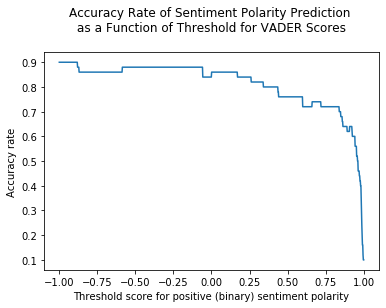

In [24]:
thresholds = np.linspace(-1,1,1000)
acc_rates = [try_threshold_for_accuracy(VADER_polarity_test_df['VADER Score'],threshold) for threshold in thresholds]

plt.plot(thresholds, acc_rates)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Accuracy rate")
plt.title("Accuracy Rate of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n")
plt.show()

### Training your Own Sentiment Classifier (Supervised Machine Learning)

Given that we have **labels** in the data, we can take advantage of them and train our own **sentiment classifier**. Let's do it and see if the performance of the custom classifier would be better than of the lexicon-based model above.

Start by vectorizing the normalized training dataset. Let's use TF-IDF approach and use a mix of **uni-grams** and **bi-grams** as features:

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range = (1,2)) 
feature_matrix_TRAIN = vectorizer.fit_transform(normalized_train_reviews).astype(float)

Have a look at the feature matrix with unigrams and bi-grams for the **training** data and note the n-grams:

In [26]:
feature_matrix_TRAIN_names = vectorizer.get_feature_names() 
feature_matrix_TRAIN_table = pd.DataFrame(data = feature_matrix_TRAIN.todense(), 
                                          columns = feature_matrix_TRAIN_names)
feature_matrix_TRAIN_table.head()

,ability,ability move,able,able answer,able compare,able hear,able read,absolute,absolute best,absolutely,...,year first,year hd,year miss,year model,year purchase,year rarely,year recently,year tinny,zombies,zombies love
0,0.0,0.0,0.024929,0.0,0.0,0.0,0.043183,0.00000,0.00000,0.0,...,0.000000,0.000000,0.043183,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.05101,0.05101,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.154423,0.154423
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,...,0.044496,0.044496,0.000000,0.088992,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


Vectorize **test data** using the features created based on the training data:

In [27]:
feature_matrix_TEST = vectorizer.transform(normalized_test_reviews)

Let's use Support Vector Machines (SVM) to train our custom sentiment classifier:

In [28]:
from sklearn import linear_model

svm = linear_model.SGDClassifier(loss='hinge', random_state = 0) 
svm.fit(feature_matrix_TRAIN, train_polarity)
predicted_svm = svm.predict(feature_matrix_TEST) 

Compute the accuracy rate for the classifier:

In [29]:
print('Accuracy rate:', np.round(metrics.accuracy_score(test_polarity, predicted_svm), 3))

Accuracy rate: 0.9


Have a look at a sample of reviews and their predicted and actual sentiment:

In [30]:
sample_ids = [10, 15, 25, 34, 45] 
for doc_index in sample_ids:
    print('Review:-')
    print(test_reviews[doc_index])
    print('\nActual Labeled Sentiment:', test_polarity[doc_index])
    print('Predicted Sentiment:', predicted_svm[doc_index])   
    print('-'*60)

Review:-
Simply put, this is the Amazons iPad Air Killer. The 7 HDX is the iPad mini killer. Both HDXs inherent very similar hardware. This means the 8.9 version is an enlarged version of the 7 version. For my 7 version review, please search for my HDX 7 review.My profile: Im a heavy tablet user for personal and business purposes. I work on my tablet around 4-5 hours a day (Email / Documents / Spreadsheet / PDF) use the tablet 1-2 hours for personal use such as watching movies or reading books/magazine. The HDX tablet is my go-to device for all internet related search I do. It is also my main electronic device, more important than my smartphones and laptopsI have the following and/or used the following before:1) iPad 12) iPad 23) iPad 44) iPad Mini5) Kindle Fire6) Kindle Fire HD7) Kindle Fire HD 8.98) Asus Transformer with Keyboard9) Nexus 7 First Gen10) Kindle HDX 7 which I also have a review you can check outAs you can see, I been through many devices and hope this review with my exp

## To See what products and what categories of products to advertise more based on our results:

We first create a dataframe based on the sentiment prediction by SVM:

In [31]:
SVM_predicted_sentiment_df = pd.DataFrame(predicted_svm, columns = ['SVM Predicted Sentiment'])
SVM_predicted_sentiment_df.head()

,SVM Predicted Sentiment
0,positive
1,positive
2,positive
3,positive
4,positive


Match with their categories and product names:

In [33]:
df_info = test_data[['categories','name']]
df_prediction = pd.concat([df_info, SVM_predicted_sentiment_df], axis=1)
df_prediction.head()

,categories,name,SVM Predicted Sentiment
0,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,positive
1,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,positive
2,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,positive
3,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,positive
4,"Kindle Store,Amazon Devices,Electronics",Kindle Keyboard,positive


We filter out rows with positive predicted sentiment:

In [34]:
positive_sentiment_df= df_prediction[df_prediction['SVM Predicted Sentiment']=='positive']
positive_sentiment_df

,categories,name,SVM Predicted Sentiment
0,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,positive
1,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,positive
2,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,positive
3,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,positive
4,"Kindle Store,Amazon Devices,Electronics",Kindle Keyboard,positive
5,"Kindle Store,Amazon Devices,Electronics",Kindle Keyboard,positive
6,"Kindle Store,Amazon Devices,Electronics",Kindle Keyboard,positive
7,"Categories,Amazon Devices,Streaming Media Players",Certified Refurbished Amazon Fire TV (Previous...,positive
8,"Categories,Amazon Devices,Streaming Media Players",Certified Refurbished Amazon Fire TV (Previous...,positive
9,"Categories,Amazon Devices,Streaming Media Players",Certified Refurbished Amazon Fire TV (Previous...,positive


Let's find out which categories have more reviews with positive sentiment:

In [35]:
counts_c = positive_sentiment_df.categories.value_counts()
percent100_c = positive_sentiment_df.categories.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts_c, 'percent100': percent100_c})

,counts,percent100
Amazon Devices,14,28.0%
"Amazon Devices,Kindle Store",9,18.0%
"Categories,Amazon Devices,Electronics Features,Streaming Media Players,Consumer Electronics,See more Amazon Fire TV Digital HD Media Streamer (Late...",8,16.0%
"Electronics,Amazon Devices",7,14.0%
"Amazon Devices,mazon.co.uk",4,8.0%
"Categories,Amazon Devices,Streaming Media Players",3,6.0%
"Kindle Store,Amazon Devices,Electronics",3,6.0%
"Amazon Devices & Accessories,Amazon Device Accessories,Power Adapters & Cables,Kindle Store,Kindle E-Reader Accessories,Kindle Paperwhite Accessories",1,2.0%
"Amazon Devices,Kindle Accessories",1,2.0%


Similarly, we can see what products have more reviews with positive sentiment.

In [36]:
counts_n = positive_sentiment_df.name.value_counts()
percent100_n = positive_sentiment_df.name.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts_n, 'percent100': percent100_n})

,counts,percent100
Amazon Fire TV,8,16.0%
Fire HD 6 Tablet,6,12.0%
Kindle Paperwhite,4,8.0%
Certified Refurbished Amazon Fire TV (Previous Generation - 1st),3,6.0%
Kindle Keyboard,3,6.0%
All-New Amazon Kid-Proof Case for Amazon Fire 7 Tablet (7th Generation,2,4.0%
All-New Amazon Fire HD 8 Tablet Case (7th Generation,2,4.0%
"Kindle Fire HDX 8.9""",2,4.0%
Fire HD 10 Tablet with Alexa,2,4.0%
Amazon Fire TV Game Controller,2,4.0%
